saatler arasında anlamlı farklar olabilir
categorical Particle Counter',
 'External Power Limit',
 'Blade-2 Actual Value_Angle-B',
 'Blade-1 Actual Value_Angle-B',
 'Blade-3 Actual Value_Angle-B
 




In [1]:
import pandas as pd 
import numpy as np
features = pd.read_csv('features.csv')
power = pd.read_csv('power.csv')
sample_submission = pd.read_csv('sample_submission.csv')
temperature = pd.read_csv('Temperature.csv',sep=';')



pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
main = pd.merge(features,power,how = 'left',on = 'Timestamp')
main.rename(columns={'Power(kW)':'power'},inplace=True)

train = main[main['power'].isna() == False]
test = main[main['power'].isna()]

In [2]:
main.shape

(154262, 78)

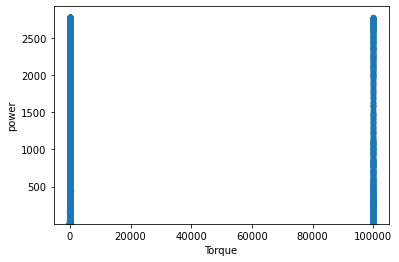

In [11]:
main.plot.scatter(x='Torque', y='power', ylim=(0.001));

In [29]:
main.power.mean()

1138.5563496164325

In [30]:
sam= main.sample(5000)

In [31]:
sam.power.mean()

1120.4500966408498

In [ ]:
#scatter plot totalbsmtsf/saleprice

data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<AxesSubplot:xlabel='Torque', ylabel='power'>

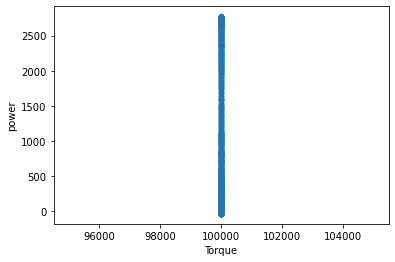

In [35]:
main[main.Torque > 20000].plot.scatter(x='Torque',y = 'power')

<AxesSubplot:xlabel='Torque', ylabel='power'>

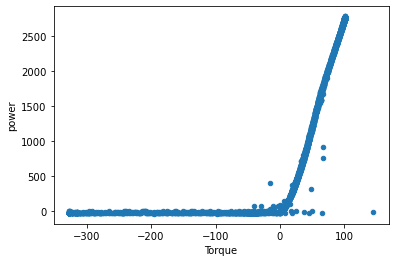

In [33]:
sam[sam.Torque < 20000].plot.scatter(x='Torque',y = 'power')

In [16]:
##RFE CHOSEN FEATURES

liste = ['Timestamp','Torque', 'Converter Control Unit Reactive Power',
       'Temperature Trafo-2', 'Reactive Power', 'Temperature Shaft Bearing-1',
       'Gearbox_Distributor_Temperature', 'Moment D Filtered',
       'Moment D Direction', 'N-set 1', 'Operating State', 'Power Factor',
       'Temperature Shaft Bearing-2', 'Temperature_Nacelle', 'Voltage A-N',
       'Temperature Axis Box-3', 'State and Fault', 'Proxy Sensor_Degree-225',
       'Blade-3 Actual Value_Angle-A', 'Scope CH 4',
       'Blade-2 Actual Value_Angle-A', 'Blade-1 Actual Value_Angle-A',
       'Blade-2 Set Value_Degree', 'Pitch Demand Baseline_Degree',
       'Blade-1 Set Value_Degree', 'Blade-3 Set Value_Degree',
       'Moment Q Direction', 'Moment Q Filltered', 'Proxy Sensor_Degree-45',
       'Turbine State', 'Proxy Sensor_Degree-315','power']

In [17]:
test = test[liste]

In [18]:
train = train[liste]

In [21]:
train = train.dropna()
train.shape

(19397, 31)

In [20]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'])
train = train[(train.Timestamp.dt.month >= 8) & (train.Timestamp.dt.month <= 12)]
train = train.drop('Timestamp',axis = 1)

In [34]:
X_test = test.drop(['power','Timestamp'],axis =1)


In [35]:
X_test.head()

,Torque,Converter Control Unit Reactive Power,Temperature Trafo-2,Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,Moment D Direction,N-set 1,Operating State,Power Factor,Temperature Shaft Bearing-2,Temperature_Nacelle,Voltage A-N,Temperature Axis Box-3,State and Fault,Proxy Sensor_Degree-225,Blade-3 Actual Value_Angle-A,Scope CH 4,Blade-2 Actual Value_Angle-A,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315
136730,100.958351,567.088318,128.000000,535.359985,48.0,47.000000,261.222717,264.770386,1735.0,16.0,0.979850,43.000000,31.003334,407.476654,37.0,2.0,5.876678,8.269771,8.269771,9.494538,9.020904,9.493241,8.925109,9.014512,8.266594,-41.861877,-37.917656,5.739297,1.0,5.734730
136731,100.329117,324.888336,128.000000,294.001678,48.0,47.000000,270.871674,271.347107,1735.0,16.0,0.989005,43.000000,31.000000,405.035004,37.0,2.0,5.872590,6.293597,6.293597,7.516338,7.031114,7.507399,6.937748,7.022389,6.287027,-19.210815,-19.602339,5.720869,1.0,5.726634
136732,100.444016,361.404999,127.551666,331.353333,48.0,46.900002,264.673279,265.549255,1735.0,16.0,0.989917,43.000000,31.000000,405.660004,37.0,2.0,5.871985,6.841763,6.841763,8.060219,7.579885,8.065812,7.497398,7.581376,6.844808,-28.144068,-34.329105,5.727475,1.0,5.728649
136733,100.590530,361.053345,127.000000,329.538330,48.0,46.285000,244.336014,240.028870,1735.0,16.0,0.990000,43.000000,31.000000,405.601654,37.0,2.0,5.874398,6.902684,6.902684,8.131298,7.656176,8.132490,7.565773,7.654368,6.909220,-7.592476,-11.718444,5.728980,1.0,5.739824
136734,101.075531,341.214996,127.000000,309.578339,48.0,46.463333,243.551773,240.619141,1735.0,16.0,0.990000,42.983334,31.000000,405.261658,37.0,2.0,5.882390,8.315566,8.315566,9.547508,9.063366,9.546413,8.974770,9.064083,8.313858,-7.760864,-9.863355,5.736651,1.0,5.747692


In [36]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X= main[['Gearbox_Oil_Temperature']]
sc = MinMaxScaler()
X = sc.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
b = kmeans.labels_

a = kmeans.predict(X)

c = kmeans.cluster_centers_
main['cluster'] = b
#main.cluster = main.cluster + 1

In [ ]:
lowerdic = {}
def get_lower_quantile(col):
    lowerdic[col] = main[col].quantile(0.01)
count = 0
for i in main.columns:
    get_lower_quantile(i)
    count += 1
    if count == 4:
        break
        
upperdic = {}
def get_upper_quantile(col):
    upperdic[col] = main[col].quantile(0.96)
count = 0
for i in main.columns:
    get_upper_quantile(i)
    count += 1
    if count == 4:
        break
        
        
for i,j in lowerdic.items():
    main = main[main[i] > j]
    
for i,j in upperdic.items():
    main = main[main[i] < j]
        

In [ ]:
from sklearn.model_selection import train_test_split

X= main.drop(['power'],axis = 1)
y = main[['power']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [37]:
X_train = train.drop('power',axis = 1)
y_train = train['power']

In [38]:
X_train.shape,X_test.shape

((19397, 30), (17532, 30))

In [40]:
X_test.head()

,Torque,Converter Control Unit Reactive Power,Temperature Trafo-2,Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,Moment D Direction,N-set 1,Operating State,Power Factor,Temperature Shaft Bearing-2,Temperature_Nacelle,Voltage A-N,Temperature Axis Box-3,State and Fault,Proxy Sensor_Degree-225,Blade-3 Actual Value_Angle-A,Scope CH 4,Blade-2 Actual Value_Angle-A,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315
0,100.958351,567.088318,128.000000,535.359985,48.0,47.000000,261.222717,264.770386,1735.0,16.0,0.979850,43.000000,31.003334,407.476654,37.0,2.0,5.876678,8.269771,8.269771,9.494538,9.020904,9.493241,8.925109,9.014512,8.266594,-41.861877,-37.917656,5.739297,1.0,5.734730
1,100.329117,324.888336,128.000000,294.001678,48.0,47.000000,270.871674,271.347107,1735.0,16.0,0.989005,43.000000,31.000000,405.035004,37.0,2.0,5.872590,6.293597,6.293597,7.516338,7.031114,7.507399,6.937748,7.022389,6.287027,-19.210815,-19.602339,5.720869,1.0,5.726634
2,100.444016,361.404999,127.551666,331.353333,48.0,46.900002,264.673279,265.549255,1735.0,16.0,0.989917,43.000000,31.000000,405.660004,37.0,2.0,5.871985,6.841763,6.841763,8.060219,7.579885,8.065812,7.497398,7.581376,6.844808,-28.144068,-34.329105,5.727475,1.0,5.728649
3,100.590530,361.053345,127.000000,329.538330,48.0,46.285000,244.336014,240.028870,1735.0,16.0,0.990000,43.000000,31.000000,405.601654,37.0,2.0,5.874398,6.902684,6.902684,8.131298,7.656176,8.132490,7.565773,7.654368,6.909220,-7.592476,-11.718444,5.728980,1.0,5.739824
4,101.075531,341.214996,127.000000,309.578339,48.0,46.463333,243.551773,240.619141,1735.0,16.0,0.990000,42.983334,31.000000,405.261658,37.0,2.0,5.882390,8.315566,8.315566,9.547508,9.063366,9.546413,8.974770,9.064083,8.313858,-7.760864,-9.863355,5.736651,1.0,5.747692


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

In [41]:
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
model = CatBoostRegressor().fit(X_train,y_train,verbose = False)
predictions = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, predictions)))


In [ ]:
importance = list(model.feature_importances_)

In [ ]:
new = []
for i in range(len(importance)):
    if importance[i] > 0:
        new.append(i)

In [ ]:

importance

In [ ]:
feature_list = []
for i in new:
    feature_list.append(main.columns[i])


In [42]:
sample_submission['sada'] = predictions

In [43]:
sample_submission.drop(['Power(kW)'],axis= 1,inplace = True)

In [44]:
sample_submission.rename(columns = {'sada':'Power(kW)'},inplace = True)

In [45]:
sample_submission = sample_submission.set_index('Timestamp')

In [46]:
sample_submission.to_csv('enerjisa2_sub10.csv',sep=',') 